# Final Project Template
**Notebook Preparation for Lesson**

Once you open the notebook:

1. Save in on your google drive (copy to drive) and name it DMAP FA21 Final Project
2. Share the notebook and copy the share ID to the NOTEBOOK_ID (and re-save the notebook)
3. This ID should remain the same for all your milestones
4. You will submit a copy of your updated notebook (this file) on Moodle for each milestone


In [1]:
# Keep this code cell here
# Project title will be used by the reviewer
PROJECT_TITLE = "The Changing of The Public's Opinion About COVID-19 Vaccine From Early 2020 to Early 2021"
NOTEBOOK_ID   = "1kJUKyTAZDMEO6-CwBKTntRBP9m9rgpqZ"
VERSION = "FA21"


---
# Project Introduction

Double click on this cell to see its contents.  We expect you to replace this cell.

<img align="left" src="http://drive.google.com/uc?export=view&id=1nA9491MchEtFcklvtIGqOnipE63C2FGD"/>

• Describe the **context**, sitution, problem to be solved/explored

• Whatever you need to get the reader _involved_

• Images can be hosted using google drive (you may need to create a transparent border)

• Even formulas when needed: 
$$e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!}$$

• Note that markdown is very whitespace sensitive.
• Click on this cell to read comments.

<!-- this is a comment -->
<!-- 

   VIDEO INSTRUCTIONS (and data hosting)

1. upload to google drive, get the share URL
https://drive.google.com/file/d/1yGvY5a0KAqnOKf5kLh5EbbbRY4_LonAX

2. convert to export URL:
http://drive.google.com/uc?export=download&id=1yGvY5a0KAqnOKf5kLh5EbbbRY4_LonAX

3. OR use some other service to host your video:
https://storage.googleapis.com/uicourse/videos/dmap/Exact%20Instructions%20Challenge%20-%20THIS%20is%20why%20my%20kids%20hate%20me.%20%20Josh%20Darnit.mp4

replace the src="YOUR VIDEO URL" in the <source> tag in the next cell below
-->

In [2]:
%%html
<!-- this should be the ONLY html cell in the notebook: use markdown
<div style="font-size:36px; max-width:800px; font-family:Times, serif;">
The Changing of The Public's Opinion About COVID-19 Vaccine From Early 2020 to Early 2021 
<video width="600" controls>
  <source src="https://drive.google.com/file/d/11uicyngR-SBZhuivYgsnu6sWl2B2pGI2/view?usp=sharing"
  type="video/mp4">
</video>
</div>-->
<iframe src="https://drive.google.com/file/d/11uicyngR-SBZhuivYgsnu6sWl2B2pGI2/preview" width="640" height="410" title = "The Changing of The Public's Opinion About COVID-19 Vaccine From Early 2020 to Early 2021 "></iframe>
<br>Note: If your video is too large, you can host it on Vimeo, YouTube, etc and paste the URL here

In [3]:
# add your imports here for your entire project
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jerry\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


#Project Introduction

>There have been many disputes since the first COVID-19 vaccine was invented come out to the public. According to CDC, current vaccines are safe and can effectively reduce the risk of COVID-19 among people who are fully vaccinated by 90 percent or more(2021). Even though the safety and effectiveness of vaccines are backed by official statistical results, there are still many doubts about them on social media, which have affected people deciding whether to take the vaccines more broadly. Consequently, the United States is still at the risk of experiencing another wave of COVID-19 with not enough protection of vaccinations. The good news is that the vaccinated population seemed to increase more rapidly, which probably indicates that more people have been receptive to the idea of being vaccinated against the virus. According to a statistic, 51.1% of the world population has received at least one dose of a COVID-19 vaccine by Nov. 2021, while the number in America is 57.25%(Ritchie et. al, 2020). 
<br>
<br>The purpose of this study is to explore how the public’s opinion about COVID-19 vaccines has been changed over months. The study aims to help researchers find out what happened in the world that may have influenced the credibility of vaccines, as well as whether people have felt more positive about getting vaccinated. The result of this study could serve as a supplement for professionals when they are making further COVID-19 vaccination policies. Before taking a look into the actual data, I would like to assume that vaccines are being more widely accepted as time pass, according to the faster-growing vaccination rate in the United States.
<br>
<br>

Our sentiment analysis of collected Reddit posts will begin with building a model that could predict the sentiments expressed by words. To achieve that, The TF-IDF Words vectorization will be implemented to extract numerical features from text content. Then I will use the Naive Bayes algorithm to make categorization of tweets based on their sentiments and use the numbers 1, 2 to represent non-negative and negative sentiments. In the end, I will calculate the mean sentiment value each month from Jan. 2020 to Feb. 2021 and make a graph to see if any trend has appeared in the past year.



# Data Acquisition, Selection



First of all, the two .csv datasets we will use in this study are both from Kaggle and are publically accessible. Data were collected directly from corresponding social media using the praw Python package. The major difference between these two datasets is that one of them, which will be used to train and test our model, is collected from Twitter and is already labeled while the other one is unlabeled and is collected from Reddit. 

In [4]:
#The unlabeled dataset we will used to make prediction:
data = pd.read_csv('https://raw.githubusercontent.com/JerryGgzm/covid_tweet_data/main/reddit_vm.csv')
data = pd.DataFrame(data)
data.head(3)

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08


In [5]:
#The labeled dataset for building and testing model:
train = pd.read_csv('https://raw.githubusercontent.com/JerryGgzm/covid_tweet_data/main/train.csv')
train = pd.DataFrame(train)
train.head(3)

,tweet_id,label,tweet_text
0,1.360340e+18,1,"4,000 a day dying from the so called Covid-19 ..."
1,1.382900e+18,2,Pranam message for today manifested in Dhyan b...
2,1.375670e+18,2,Hyderabad-based ?@BharatBiotech? has sought fu...


# Data Cleaning

A pipe function for cleaning data:

In [6]:
def clean(tx):
  clean_data = []
  
  #helper function of function tokenize
  def normalize_token(token):
    token = token.strip()
    if token.startswith("'") or token.endswith("'"):
      token = token.replace("'"," ")
    token = token.strip()
    return token

  #split a sentence into tokens
  def tokenize(text):
    pattern = r"['A-Za-z]+-?[A-Za-z']+"
    reg = re.compile(pattern)
    tokens = reg.findall(text)
    rv = []
    for t in tokens:
      rv.append(normalize_token(t))
    return rv

  def normalize(tokens):
    #change all tokens to lowercase, remove stopwords and words that shorter than 2 characters
    rv = [t.lower() for t in tokens if t not in stopwords.words('english') and len(t) > 2]
    return rv

  clean_data = normalize(tokenize(tx))
  return clean_data

## Clean The Training&Testing Dataset

Building/Testing the model only involves the "label" and "tweet_text" columns, so we first extract them from the dataset:

In [7]:
train = train[['tweet_text','label']]

And then we drop all instances containing NaN value in them:

In [8]:
train = train.dropna(thresh=2)

Clean the textual data in the column "tweet_text":

In [9]:
train['tweet_text'] = train['tweet_text'].apply(clean)
train['tweet_text'] = train['tweet_text'].apply(lambda x: ' '.join(x))
train.head(3)

,tweet_text,label
0,day dying called covid vaccine dailybeast repo...,1
1,pranam message today manifested dhyan meenapra...,2
2,hyderabad-based bharatbiotech sought funds gov...,2


Becaue our goal is to predict whether target Reddit posts are negative or nonnegative, we will make adjustments on the "label" column, in which 1 will represents non-negative(positive and neutral) sentiments and 2 will represents negative sentiment.

In [10]:
#label both "positive" and "neutral" results with 1.
train['label'].replace(2, 1, inplace = True)
#label "negative" results with 3.
train['label'].replace(3, 2, inplace = True)
train.head(7)

,tweet_text,label
0,day dying called covid vaccine dailybeast repo...,1
1,pranam message today manifested dhyan meenapra...,1
2,hyderabad-based bharatbiotech sought funds gov...,1
3,confirmation chinese vaccines high protection ...,1
4,lab studies suggest pfizer moderna vaccines pr...,2
5,still want take jab pfizerbiontech sideeffects...,1
6,this time aerol neas flight goes moscow pick s...,1


## Clean The Unlabeled Dataset

In this study, we will only use the "body" and "timestamp" columns in the unlabeled dataset, so we first extract them from the dataset:

In [11]:
data = data[['body','timestamp']]

And then we drop all instances containing NaN value in them:

In [12]:
data = data.dropna(thresh=2)

Clean the textual data in the column "body":

In [13]:
data['body'] = data['body'].apply(clean)
data['body'] = data['body'].apply(lambda x: ' '.join(x))
data.head(3)

,body,timestamp
6,your it's myth only one vaccine contains get w...,2019-03-25 02:34:53
7,https youtu zbkvcpbnnku,2020-04-23 20:23:42
8,because anti-vaxxers sense,2020-04-24 23:19:50


Because we only need the year and month from each timestamp, we will normalize the "timestamp" column and only keep year and month. 

In [14]:
data['timestamp'] = data['timestamp'].astype(str)
data['timestamp'] = data['timestamp'].apply(lambda time: float(time[:4]+'.'+time[5:7]))
print(data.head(3))

                                                body  timestamp
6  your it's myth only one vaccine contains get w...    2019.03
7                            https youtu zbkvcpbnnku    2020.04
8                         because anti-vaxxers sense    2020.04


Then, we will filter out posts that are posted before Jan. 2020.

In [15]:
data = data.sort_values(['timestamp'], ascending = True)
data = data[data['timestamp']>=2020.01]
print(data.head(7))

                                                   body  timestamp
1086  https www cdc gov cancer hpv statistics race h...    2020.01
1089  sign petition everyone boys human deserving di...    2020.01
1088                             it's your petition lol    2020.01
1087  boys human deserving disease preventing treatm...    2020.01
1085  also girls vaccinated help protect boys sex gi...    2020.01
1047  used antivax good idea people actually think s...    2020.01
1083                                      that seem odd    2020.01


# Data Exploration
>Two attributes of the training dataset:


*   'tweet_text' : the content people post on their social media.
*   'label' : the pre-marked sentiment. 

  *   1: Non-negative sentiment
  *   2: Negative sentiment
<br>

>Two attributes of the unlabeled dataset:


*   'body' : the content people post on their social media.
*   'timestamps' : the time people posted their content. 







# Data Analysis

### Application of TF-IDF And Naive Bayes
<ul>
<li><b>TF-IDF</b>(term frequency-inverse document frequency) is a statistical technique that measures how a term is relevant to a document in a collection of documents. TF-IDF can be calculated by multiplying TF(term frequency of a word in a document) by IDF(inverse document frequency of the word across a set of documents). A term’s TF-IDF increase as it appears more times in each document, but decreases as it appears more times in the scope of all documents. Compared with TF, TF-IDF adjusts the influence of common stop words(like “a” and “the”), making the outcome more accurate. 

\begin{align}
        TF(t) = \frac{freq(t)}{n} 
\end{align}t is the term, n is the total number of terms in the document

\begin{align}
        IDF(t) = log(\frac{1+n}{1+df(t)})
\end{align}
n is the total number of documents, df(t) is the number of documents have the term in them.

\begin{align}
        TF-IDF(t) = TF(t)*IDF(t) 
\end{align}

In this project, we will implement TF-IDF using sklearn's TfidfVectorizer function, and use it to vectorize our textual data for later analysis.
<li><b>Naive Bayes</b> is a classifier algorithm based on Bayes Theorem:

\begin{align}
        P(category|feature) = \frac{P(feature|category)*P(category)}{P(feature)} 
\end{align}

with an assumption that all predictors are independent to each others.
<br>The Naive Bayes algorithm could be used to predict the probability of getting a particular result with a given feature exists. For example, if we know that

>P("good" | Positive Sentiment) = 0.5

And we know that 
>The overall probability of a tweet has a positive sentiment is 0.3.
<br>The overall probability of a tweet including the term "good" is 0.5.

Then we can predict that when a tweet includes the term "good", it has 30% chance of having a good sentiment.
<br>
Dealing with multiple terms, like a sentence, it is the same way to make a prediction, except we calculate by the probability of an ordered combination of terms instead of the probability of a single term. The equation is:

\begin{align}
        P(category|features) = P(category) * \prod_{1\le i \le n} P(feature_i|category)
\end{align}

where n is the total number of features.
<br>We will apply this algorithm to our already vectorized tweets to calculate the probability of each tweet having nonnegative or negative sentiment. For this part, MultinomialNB from module sklearn.naive_bayes will be used, it will further categorize each tweet into one of the two sentiments(negative and nonnegative) based on the probabilities it got from the last step. 

### **Step 1:**
Identify the dependent(the sentiment label) and independent variable(the tweet content) in the training&testing dataset.

In [16]:
#independent variable
x = train['tweet_text']
#dependent variable
y = train['label']

### **Step 2:**
<br>Split the training&testing dataset into a subset for training and a subset for testing the model.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### **Step 3：**
Build & Evaluate the model\.
<br>TF-IDF:


In [18]:
vectorizer = TfidfVectorizer()

Naive-Bayes:

In [19]:
nb = MultinomialNB()

sklearn's make_pipeline method encapsulats multiple different transformers alongside an estimator into one object, so we only need to call .predict or .fit once. Now let us put our TF-IDF and Naive-Bayes transformers into the pipeline.

In [20]:
pipe = make_pipeline(vectorizer, nb)

Then we fit the model and make prediction.

In [21]:
pipe.fit(x, y)
y_pred = pipe.predict(x_test)

After all, we test the accuracy of our model with the testing subset.

In [22]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87       804
           2       0.98      0.41      0.58       396

    accuracy                           0.80      1200
   macro avg       0.88      0.70      0.73      1200
weighted avg       0.84      0.80      0.78      1200



As shown in Figure 1(Desarda, 2018), the Precision of a model represents the rate of getting the relevant elements as the result. And the Recall of a model indicates what proportion of all relevant elements was recognized as relevant. The F1-Score in the third column balances the Precision and the Recall, measures the accuracy more comprehensively. Here is how F1-Score is calculated:

<br>\begin{align}
        F(β)-Score = (1+β^2)*\frac{Precision*Recall}{\beta ^2 *Precision + Recall}
\end{align}where $β$ is 1 for F1-Score Test.
<br>Because we want our model to predict sentiment by terms in users' posts, we value Precision more than Recall. Therefore, with an overall accuracy of 80%, our model is acceptable.

<br>![](https://miro.medium.com/proxy/1*WlTKk0RmvgcjWs2ikxG0fQ.jpeg)
<br><b>*Figure 1: Precision And Recall of a Model(Desarda, 2018)*

### **Step 4**:
Use the model to predict the unlabeled dataset and add a new column in the dataset to hold the results.

In [23]:
#make prediction
results = pipe.predict(data['body'])
#save the results into the column
data['predicted_sentiment'] = results
print(data.head(3))

                                                   body  timestamp  \
1086  https www cdc gov cancer hpv statistics race h...    2020.01   
1089  sign petition everyone boys human deserving di...    2020.01   
1088                             it's your petition lol    2020.01   

      predicted_sentiment  
1086                    1  
1089                    1  
1088                    1  


### **Step 5**:
Next, we will make a line graph of the monthly mean sentiment to find out how public attitude toward COVID-19 vaccine has changed in the past year.

           predicted_sentiment
timestamp                     
2020.01               1.021277
2020.02               1.000000
2020.03               1.018182
2020.04               1.000000
2020.05               1.000000
2020.06               1.000000
2020.07               1.000000
2020.08               1.000000
2020.09               1.000000
2020.12               1.000000
2021.01               1.035714
2021.02               1.000000
2021.03               1.022727
2021.04               1.023810
2021.05               1.000000
2021.06               1.000000
2021.07               1.000000
2021.08               1.000000
2021.09               1.000000
2021.10               1.000000
2021.11               1.000000


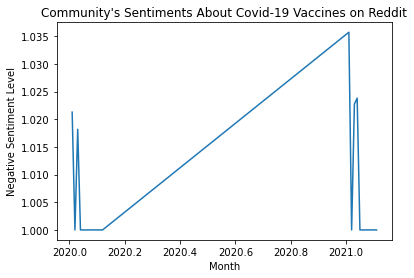

In [24]:
print(data.groupby(['timestamp']).mean())
t = data.groupby(['timestamp']).mean()
plt.plot(t)
plt.title("Community's Sentiments About Covid-19 Vaccines on Reddit")
plt.xlabel("Month")
plt.ylabel("Negative Sentiment Level")
plt.show()

# Summary

Based on the graph above, we can see that at the beginning of the pandemic(around January 2020), the public was looking forward to getting vaccinated once the vaccines come out. Most of the posts about vaccines on Reddit at that time expressed non-negative attitudes. However, the public has started to feel more negative about vaccines since February 2020, after vaccines became available to them. This negative sentiment about vaccines didn’t stop growing until the beginning of 2021. This may illustrate that after months of thinking, the public was able to view the vaccines in a more scientific way without being affected by the rumors.

# Reference List
1. Centers for Disease Control and Prevention. (2021, October 30). Covid-19 vaccine effectiveness. COVID-19 Vaccine Effectiveness. Retrieved November 9, 2021, from https://www.cdc.gov/coronavirus/2019-ncov/vaccines/effectiveness/index.html.
2. Ritchie, H., Mathieu, E., Rodés-Guirao, L., Appel, C., Giattino, C., Ortiz-Ospina, E., Hasell, J., Macdonald, B., Beltekian, D., &amp; Roser, M. (2020, March 5). Coronavirus (COVID-19) vaccinations - statistics and research. Our World in Data. Retrieved November 9, 2021, from https://ourworldindata.org/covid-vaccinations.
3. Desarda, A. (2018). Venn Dig for Precision &amp; Recall. Bias -Variance &amp; Precision-Recall Trade-offs: How to aim for the sweet spot. Towards Data Science. Retrieved November 21, 2021, from https://miro.medium.com/proxy/1*WlTKk0RmvgcjWs2ikxG0fQ.jpeg. 
